In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.5 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 1.1 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img_train_class0 = cv.imread('/content/gdrive/My Drive/Colab Notebooks/Dataset/Train/C0/img_844.jpg',cv.IMREAD_GRAYSCALE)          # trainImage
img_train_class5 = cv.imread('/content/gdrive/My Drive/Colab Notebooks/Dataset/Train/C5/img_735.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img_test_class0 = cv.imread('/content/gdrive/My Drive/Colab Notebooks/Dataset/Train/C0/img_1355.jpg',cv.IMREAD_GRAYSCALE)          # trainImage
img_test_class5 = cv.imread('/content/gdrive/My Drive/Colab Notebooks/Dataset/Train/C5/img_1395.jpg',cv.IMREAD_GRAYSCALE) # queryImage


SIFT Feature detector

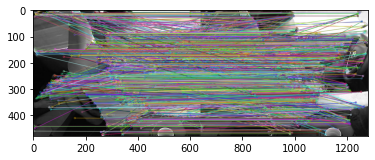

(<matplotlib.image.AxesImage at 0x7f3e760f86d0>, None)

In [5]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline


#sift
sift = cv2.xfeatures2d.SIFT_create()

kp_train_c0, des_train_c0 = sift.detectAndCompute(img_train_class0,None)
kp_train_c5, des_train_c5 = sift.detectAndCompute(img_train_class5,None) # selected
kp_test_c0, des_test_c0 = sift.detectAndCompute(img_test_class0,None)
kp_test_c5, des_test_c5 = sift.detectAndCompute(img_test_class5,None) # selected

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1)

# Match descriptors.
matches_C0_C0 = bf.match(des_train_c0,des_test_c0)
matches_C0_C5 = bf.match(des_train_c0,des_test_c5)
matches_C5_C5 = bf.match(des_train_c5,des_test_c5) # selected
matches_C5_C0 = bf.match(des_train_c5,des_test_c0)

# Sort them in the order of their distance.
matches = sorted(matches_C5_C5, key = lambda x:x.distance)

# Draw matches
img3 = cv.drawMatches(img_train_class5,kp_train_c5,img_test_class5,kp_test_c5,matches[: : -1],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [10]:
print(len(matches[: : -1]))

1565


Using David Lowe’s ratio test to find the long matches

In [ ]:
matches = bf.knnMatch (des_train_c5, des_test_c5,k=2)
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6*m2.distance:
    good_matches.append([m1])
print(len(good_matches))

282


SURF

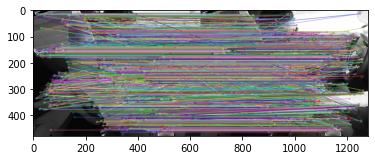

(<matplotlib.image.AxesImage at 0x7f3e740a1a50>, None)

In [11]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline


#sift
surf = cv2.xfeatures2d.SURF_create()

kp_train_c0, des_train_c0 = surf.detectAndCompute(img_train_class0,None)
kp_train_c5, des_train_c5 = surf.detectAndCompute(img_train_class5,None)
kp_test_c0, des_test_c0 = surf.detectAndCompute(img_test_class0,None)
kp_test_c5, des_test_c5 = surf.detectAndCompute(img_test_class5,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1)

# Match descriptors.
matches_C0_C0 = bf.match(des_train_c0,des_test_c0)
matches_C0_C5 = bf.match(des_train_c0,des_test_c5)
matches_C5_C5 = bf.match(des_train_c5,des_test_c5)
matches_C5_C0 = bf.match(des_train_c5,des_test_c0)

# Sort them in the order of their distance.
matches = sorted(matches_C5_C5, key = lambda x:x.distance)

# Draw matches
img3 = cv.drawMatches(img_train_class5,kp_train_c5,img_test_class5,kp_test_c5,matches[: : -1],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [12]:
print(len(matches[: : -1]))

2136


Using David Lowe’s ratio test to find the long matches

In [13]:
matches = bf.knnMatch (des_train_c5, des_test_c5,k=2)
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6*m2.distance:
    good_matches.append([m1])
print(len(good_matches))

328


Canny Edge detection

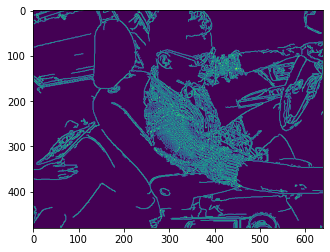

In [ ]:
t_lower = 50 
t_upper = 150 
  
edge = cv2.Canny(img_train_class5, t_lower, t_upper)
  

plt.imshow(edge)

cv2.waitKey(0)
cv2.destroyAllWindows()

Histogram of oriented gradients

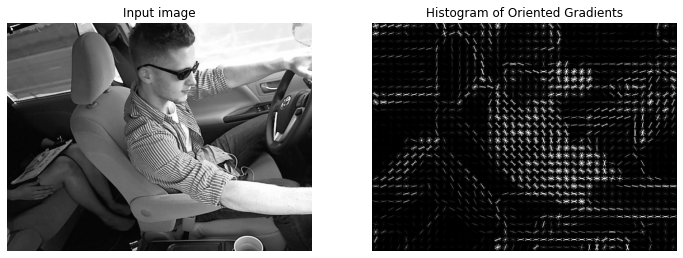



Feature vector shape: (9600,)


In [ ]:
import numpy as np
from skimage import feature 
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure, data_dir

import os
from skimage import io



fd, hog_image = hog(img_train_class5, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_train_class5, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


print("\n\nFeature vector shape:",fd.shape)

In [1]:
import cv2
import numpy as np

image = cv2.imread('dataset/image.jpg')

In [2]:
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

operatedImage = np.float32(operatedImage)

dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)

image[dest > 0.01 * dest.max()]=[0, 0, 255]


cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
t_lower = 50 
t_upper = 150 
  
  
cv2.imshow('Harrison Corner detection', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('image.jpg')

orb = cv2.ORB_create()

kp = orb.detect(image,None)

kp, des = orb.compute(image, kp)

img2 = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)

cv2.imshow('Orb Detection', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
query_img = cv2.imread('image.jpg')
train_img = cv2.imread('image.jpg')

query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)

final_img = cv2.resize(final_img, (1000,650))

cv2.imshow("Matches", final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()